In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

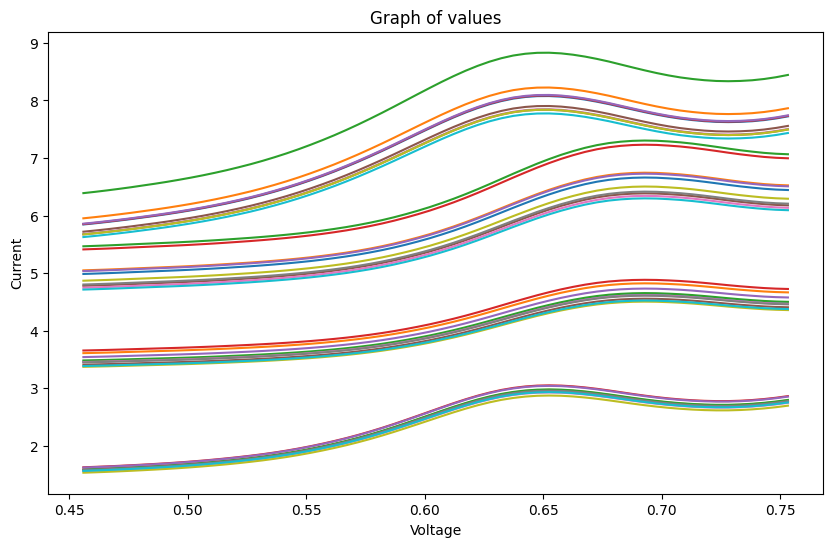

In [48]:
# Load the data from the Excel file
file_name = 'sample.xlsx'  # Change this to your file path
file_path = '../' + file_name

data = pd.read_excel(file_path)

# Convert the data to numeric, setting errors='coerce' to handle non-numeric values
data = data.apply(pd.to_numeric, errors="coerce")

# Drop rows with NaN values that might have been introduced due to non-numeric data
data = data.dropna()

specific_rows = data.iloc[170:230]

# Assuming the first column is x-axis values and the rest are y-axis values
x_values = specific_rows.iloc[:, 0].values
y_values = specific_rows.iloc[:, 1:].values

# Plotting the Data
plt.figure(figsize=(10, 6))
for idx in range(y_values.shape[1]):
    plt.plot(x_values, y_values[:, idx])

plt.xlabel("Voltage")
plt.ylabel("Current")
plt.title("Graph of values")
plt.show()

In [34]:
def fitness_function(range_indices, x_values, y_values):
    start_idx, end_idx = range_indices
    if start_idx >= end_idx:
        return 0  # Invalid range
    peaks_sum = 0
    for y in y_values.T:
        segment = y[start_idx:end_idx]
        peaks_sum += np.max(segment)
    return peaks_sum


def selection(population, fitness_scores, num_parents):
    fitness_scores = np.array(fitness_scores)
    # Normalize fitness scores to sum to 1
    fitness_scores_normalized = fitness_scores / fitness_scores.sum()
    selected_indices = np.random.choice(
        np.arange(len(population)), size=num_parents, p=fitness_scores_normalized
    )
    parents = [population[idx] for idx in selected_indices]
    return parents


def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        child = [
            random.choice([gene1, gene2]) for gene1, gene2 in zip(parent1, parent2)
        ]
        offspring.append(child)
    return offspring


def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(0, len(x_values) - 1)
    individual.sort()  # Ensure the range remains valid
    return individual

In [43]:
population_size = 50
chromosome_length = 2
population = [
    [random.randint(0, len(x_values) - 1) for _ in range(chromosome_length)]
    for _ in range(population_size)
]

# Ensure the initial population has valid ranges
for individual in population:
    individual.sort()

mutation_rate = 0.1
num_generations = 5000

num_parents = population_size // 2


for generation in range(num_generations):

    fitness_scores = [fitness_function(
        ind, x_values, y_values) for ind in population]

    parents = selection(population, fitness_scores, num_parents)

    offspring = crossover(parents, population_size - num_parents)

    offspring = [mutate(child, mutation_rate) for child in offspring]

    population = parents + offspring


# Find the best solution

best_solution = max(

    population, key=lambda ind: fitness_function(ind, x_values, y_values)
)
best_range_indices = best_solution

best_range = x_values[best_range_indices[0]: best_range_indices[1]]

print(f"The best range is between {best_range[0]} and {best_range[-1]}")

The best range is between 0.632324 and 0.712891


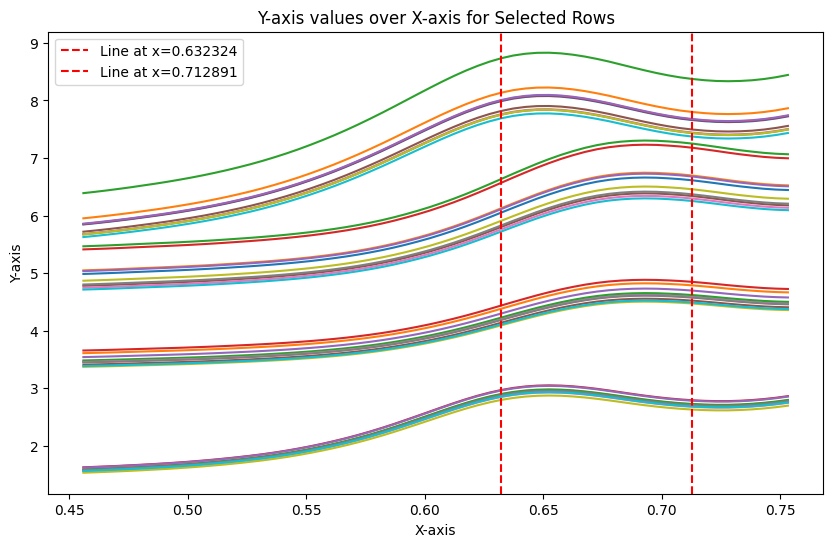

In [46]:
plt.figure(figsize=(10, 6))
for idx in range(y_values.shape[1]):
    plt.plot(x_values, y_values[:, idx])

vertical_lines_x = [
    best_range[0],
    best_range[-1],
]  # Example: first and last x value in the selected range
for x in vertical_lines_x:
    plt.axvline(x=x, color="r", linestyle="--", label=f"Line at x={x}")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Optimal range")
plt.legend()
plt.show()